----------------------------
#### CNN with regularization

- Let's improve upon our base CNN model by adding in 
    - `one more convolution layer`, 
    - another dense hidden layer. 
    - Besides this, we will add dropout of 0.3 after each hidden dense layer to enable regularization. 
    

In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

from random import sample, randint 

In [2]:
location_train = r'D:\MYLEARN\DATASETS\Images\dogs-vs-cats\train'

In [4]:
train_dir = location_train+'\\'+'training_data'
val_dir   = location_train+'\\'+'validation_data'

In [5]:
train_files = glob.glob(train_dir+'/*')

**Keras load_img**

|Arg        | Description                            |
|-------    | ---------------                        |
|path	    | Path to image file.                    |
|grayscale	| DEPRECATED use color_mode="grayscale". |
|color_mode	| One of "grayscale", "rgb", "rgba". Default: "rgb". The desired image format.|
|target_size| either None (default to original size) or tuple of ints (img_height, img_width).|
|interpolation	| Interpolation method used to resample the image if the target size is different from that of the loaded image. Supported methods are "nearest", "bilinear", and "bicubic". If PIL version 1.1.3 or newer is installed, "lanczos" is also supported. If PIL version 3.4.0 or newer is installed, "box" and "hamming" are also supported. By default, "nearest" is used.|

In [6]:
IMG_DIM = (150, 150)

<class 'PIL.JpegImagePlugin.JpegImageFile'>
JPEG
RGB
(359, 270)


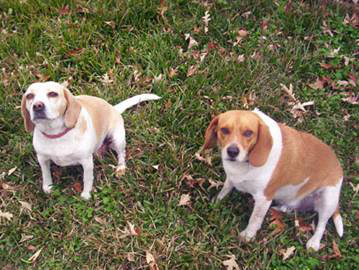

In [19]:
# load a random image
img = load_img(train_files[randint(0, len(train_files))])

# report details about the image
print(type(img))
print(img.format)
print(img.mode)
print(img.size)
array_to_img(img)

We can confirm that the 
- image was loaded as a PIL image in JPEG format 
- with RGB channels and 
- the size of 640 by 427 pixels.... varying sizes

In [8]:
# show the image
img.show()

load all training images 
- PIL image (jpeg)

In [9]:
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]

convert to numpy array

In [10]:
train_imgs = np.array(train_imgs)
train_imgs.shape

(3000, 150, 150, 3)

extract labels 

In [11]:
train_labels = [fn.split('.')[0].split('\\')[-1] for fn in train_files]
len(train_labels)

3000

load validation samples

In [12]:
validation_files = glob.glob(val_dir+'/*')

validation_imgs   = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs   = np.array(validation_imgs)
validation_labels = [fn.split('.')[0].split('\\')[-1] for fn in validation_files]
len(validation_labels)


1000

In [13]:
print('Train dataset shape:', train_imgs.shape, '\nValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 
Validation dataset shape: (1000, 150, 150, 3)


- we have 3000 training images and 1000 validation images. 
- Each image is of size 150 x 150 and has 3 channels for red, green, and blue (RGB), hence giving each image the (150, 150, 3) dimensions. 
- We will now scale each image with pixel values between (0, 255) to values between (0, 1) because deep earning models work really well with small input values:

In [14]:
train_imgs_scaled      = train_imgs.astype('float32')
validation_imgs_scaled = validation_imgs.astype('float32')

train_imgs_scaled      /= 255
validation_imgs_scaled /= 255

(150, 150, 3)


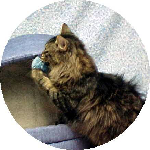

In [15]:
# visualize a sample image
print(train_imgs[0].shape)
array_to_img(train_imgs[15])

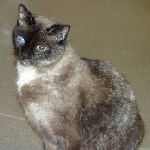

In [16]:
array_to_img(validation_imgs[15])

##### convert labels to numeric

In [20]:
batch_size  = 30
num_classes = 2
epochs      = 30
input_shape = (150, 150, 3)

In [21]:
# encode text category labels
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()
le.fit(train_labels)

train_labels_enc      = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [23]:
le.classes_

array(['cat', 'dog'], dtype='<U3')

In [24]:
print(train_labels[1495:1505], train_labels_enc[1495:1505])

['cat', 'cat', 'cat', 'cat', 'cat', 'dog', 'dog', 'dog', 'dog', 'dog'] [0 0 0 0 0 1 1 1 1 1]


#### CNN model with regularization

- 1 more CONV layer
- 1 more Dense layer
- dropout layer

In [25]:
import tensorflow
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from tensorflow.keras import optimizers

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [128]:
#!pip install git+https://github.com/tensorflow/docs

In [26]:
model = Sequential()

# convolution and pooling layers
model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        9280      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [28]:
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

In [29]:
history = model.fit(x              =train_imgs_scaled, 
                    y              =train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size     =batch_size,
                    epochs         =epochs,
                    verbose        =1,
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])

Epoch 1/30
100/100 [==============================] - ETA: 0s - loss: 0.7059 - accuracy: 0.5370
Epoch: 0, accuracy:0.5370,  loss:0.7059,  val_accuracy:0.5230,  val_loss:0.7104,  
100/100 [==============================] - 97s 952ms/step - loss: 0.7059 - accuracy: 0.5370 - val_loss: 0.7104 - val_accuracy: 0.5230
Epoch 2/30
100/100 [==============================] - 87s 872ms/step - loss: 0.6740 - accuracy: 0.5910 - val_loss: 0.6707 - val_accuracy: 0.6040
Epoch 3/30
100/100 [==============================] - 84s 842ms/step - loss: 0.6346 - accuracy: 0.6473 - val_loss: 0.7204 - val_accuracy: 0.5910
Epoch 4/30
100/100 [==============================] - 99s 988ms/step - loss: 0.6093 - accuracy: 0.6797 - val_loss: 0.6519 - val_accuracy: 0.6300
Epoch 5/30
100/100 [==============================] - 85s 848ms/step - loss: 0.5681 - accuracy: 0.7023 - val_loss: 0.6241 - val_accuracy: 0.6560
Epoch 6/30
100/100 [==============================] - 85s 850ms/step - loss: 0.5235 - accuracy: 0.7477 - va

- we `still` end up `overfitting` the model, 
- It takes `slightly longer` 
- slightly better validation accuracy of around 78%, which is decent but not great.


The `reason for model overfitting` is because 
- we have much less training data and the model keeps seeing the same instances over time across  each epoch. 
- A way to combat this would be to leverage an `image augmentation` strategy to augment our existing raining data with images that are slight variations of the existing images. 

In [30]:
len(history.history['accuracy'])

18

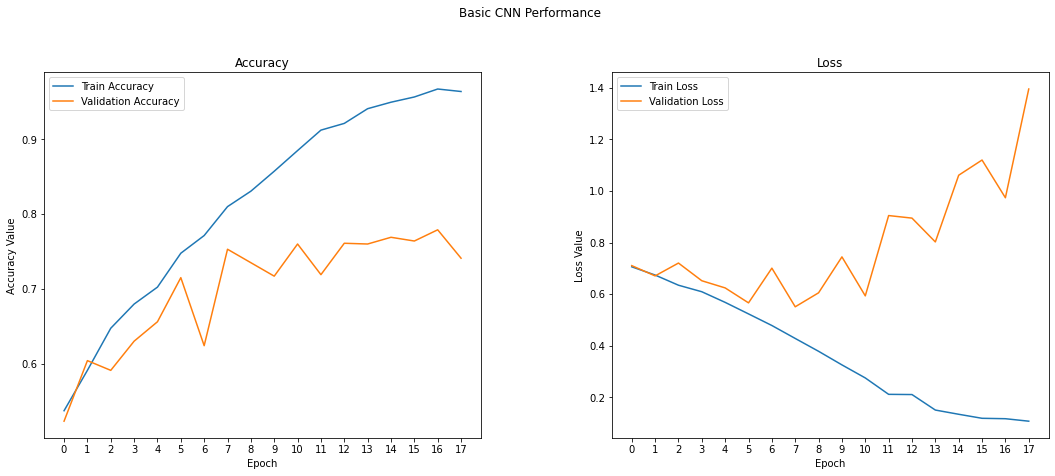

In [31]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
t = f.suptitle('Basic CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)
epoch_list = list(range(1,31))

ax1.plot(range(len(history.history['accuracy'])), history.history['accuracy'],     label='Train Accuracy')
ax1.plot(range(len(history.history['accuracy'])), history.history['val_accuracy'], label='Validation Accuracy')

ax1.set_xticks(np.arange(0, len(history.history['accuracy']), 1))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(range(len(history.history['accuracy'])), history.history['loss'],     label='Train Loss')
ax2.plot(range(len(history.history['accuracy'])), history.history['val_loss'], label='Validation Loss')

ax2.set_xticks(np.arange(0, len(history.history['accuracy']), 1))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")

#### Saving model/parameters

In [32]:
import pickle
import os

In [36]:
def model_save(model, encoder, model_save_path):
    _create_folder_if_it_doesnt_exist(model_save_path)
    _save_parameters(model_save_path)
    _save_weights(model_save_path)
    _save_encoder(model_save_path, encoder)

def _create_folder_if_it_doesnt_exist(model_save_path):
    if not os.path.exists(model_save_path):
        os.makedirs(model_save_path)

def _save_parameters(model_save_path):
    parameters = [
        input_shape,
    ]
    save_parameters_file = os.path.join(model_save_path, "02_CNN_reg_parameters.pkl")
    with open(save_parameters_file, "wb") as f:
        pickle.dump(parameters, f)

def _save_weights(model_save_path):
    save_weights_file = os.path.join(model_save_path, "02_CNN_reg_weights.h5")
    model.save_weights(save_weights_file)
    
def _save_encoder(model_save_path, encoder):
    save_encoder_file = os.path.join(model_save_path, "02_CNN_reg_encoder.pkl")
    with open(save_encoder_file, "wb") as f:
        pickle.dump(encoder, f)

In [38]:
model_save_path = './transfer_learning_models_save'

model_save(model=model, encoder=le, model_save_path=model_save_path)